## Regularizing neural networks

### General imports

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random as rn
import os

### Keras specific imports

In [98]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.constraints import maxnorm
from keras.regularizers import l2, l1

### First step is to load data from file and plot a few examples

In [99]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:5000]
train_y_short = train_y[:5000]
print(train_x_short.shape)
print(train_y_short.shape)

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
(5000, 784)
(5000, 10)


### Plot some examples

In [100]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

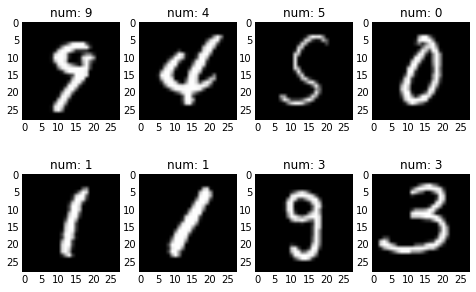

In [101]:
plotExamples(train_x, train_y)

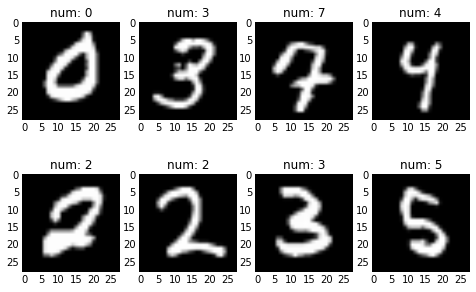

In [102]:
plotExamples(test_x, test_y)

## Motivating example: Few examples, network with a lot of capacity

In [103]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_96 (Dense)                 (None, 1024)          803840      dense_input_32[0][0]             
____________________________________________________________________________________________________
activation_96 (Activation)       (None, 1024)          0           dense_96[0][0]                   
____________________________________________________________________________________________________
dense_97 (Dense)                 (None, 10)            10250       activation_96[0][0]              
____________________________________________________________________________________________________
activation_97 (Activation)       (None, 10)            0           dense_97[0][0]                   
Total params: 814090
______________________________________________________________________

### Helper functions

In [104]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))
    
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect

In [106]:
accuracy(test_x, test_y, model)

Accuracy on data is: 91.58%


## L1 and L2 weight regularization

#### L2 weight regularization
- What happens as you change the regularization parameter?

In [114]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l2(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_110 (Dense)                (None, 1024)          803840      dense_input_39[0][0]             
____________________________________________________________________________________________________
activation_110 (Activation)      (None, 1024)          0           dense_110[0][0]                  
____________________________________________________________________________________________________
dense_111 (Dense)                (None, 10)            10250       activation_110[0][0]             
____________________________________________________________________________________________________
activation_111 (Activation)      (None, 10)            0           dense_111[0][0]                  
Total params: 814090
______________________________________________________________________

In [115]:
accuracy(test_x, test_y, model)

Accuracy on data is: 92.29%


#### L1 weight regularization

In [116]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l1(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_112 (Dense)                (None, 1024)          803840      dense_input_40[0][0]             
____________________________________________________________________________________________________
activation_112 (Activation)      (None, 1024)          0           dense_112[0][0]                  
____________________________________________________________________________________________________
dense_113 (Dense)                (None, 10)            10250       activation_112[0][0]             
____________________________________________________________________________________________________
activation_113 (Activation)      (None, 10)            0           dense_113[0][0]                  
Total params: 814090
______________________________________________________________________

In [117]:
accuracy(test_x, test_y, model)

Accuracy on data is: 25.629999999999995%


### Dropout
- What happens if you increase the proportion of nodes dropped?
- What happens if you apply dropout after every layer?
- Can the models be trained for longer now without overfitting? Do more epochs improve the results?

In [118]:
'''
Dropout is incorporated through a separate layer, the same dimension of the previous layer
Each node in the dropout layer corresponds to a node in the layer below it
The operation that each dropout layer node performs is to either output zero with probability p, 
or pass on the output of the previous layer node unchanged with probability (1-p)
This has the effect of randomly "deleting" nodes from the layer below with probability p each forward pass
during training
'''

model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_114 (Dense)                (None, 1024)          803840      dense_input_41[0][0]             
____________________________________________________________________________________________________
activation_114 (Activation)      (None, 1024)          0           dense_114[0][0]                  
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 1024)          0           activation_114[0][0]             
____________________________________________________________________________________________________
dense_115 (Dense)                (None, 10)            10250       dropout_1[0][0]                  
___________________________________________________________________________________________

In [119]:
accuracy(test_x, test_y, model)

Accuracy on data is: 91.4%


In [120]:
# Increasing the size of the hidden layers
model = Sequential()
model.add(Dense(2048, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_116 (Dense)                (None, 2048)          1607680     dense_input_42[0][0]             
____________________________________________________________________________________________________
activation_116 (Activation)      (None, 2048)          0           dense_116[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 2048)          0           activation_116[0][0]             
____________________________________________________________________________________________________
dense_117 (Dense)                (None, 10)            20490       dropout_2[0][0]                  
___________________________________________________________________________________________

In [121]:
accuracy(test_x, test_y, model)

Accuracy on data is: 92.55%
